In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('../data/airbnb.csv')

In [63]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27886.0,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,132.0,3,302,6/11/2025,1.85,1,53,28,0363 974D 4986 7411 88D8
1,28871.0,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,78.0,2,710,6/16/2025,3.93,2,130,93,0363 607B EA74 0BD8 2F6F
2,29051.0,Comfortable single / double room,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,70.0,2,822,6/14/2025,4.74,2,121,86,0363 607B EA74 0BD8 2F6F
3,44391.0,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,NaN,Centrum-Oost,52.37168,4.91471,Entire home/apt,NaN,3,42,8/20/2022,0.23,1,0,0,0363 E76E F06A C1DD 172C
4,47061.0,Charming apartment in old centre,211696,Ivar,NaN,De Baarsjes - Oud-West,52.36786,4.87458,Entire home/apt,120.0,2,203,5/29/2025,1.13,1,66,5,0363 1266 8C04 4133 E6AC


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10168 non-null  float64
 1   name                            10168 non-null  object 
 2   host_id                         10168 non-null  int64  
 3   host_name                       10164 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10168 non-null  object 
 6   latitude                        10168 non-null  float64
 7   longitude                       10168 non-null  float64
 8   room_type                       10168 non-null  object 
 9   price                           6321 non-null   float64
 10  minimum_nights                  10168 non-null  int64  
 11  number_of_reviews               10168 non-null  int64  
 12  last_review                     

In [65]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [66]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             4
neighbourhood_group               10168
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              3847
minimum_nights                        0
number_of_reviews                     0
last_review                         970
reviews_per_month                   970
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                             106
dtype: int64

In [67]:
df.drop(columns = ['id','license','neighbourhood_group','host_name'], inplace=True)

In [68]:
df.columns

Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [69]:
#adding median value in price column
df['price'].fillna(df['price'].median(), inplace=True)

In [70]:
df['price'].isna().sum()

np.int64(0)

In [71]:
df['reviews_per_month'].value_counts()

reviews_per_month
0.09     166
0.18     162
0.15     151
0.11     148
0.13     148
        ... 
16.02      1
10.17      1
13.06      1
15.80      1
8.41       1
Name: count, Length: 672, dtype: int64

In [72]:
#fill reviews per month with 0 
df['reviews_per_month'].fillna(0,inplace = True)

In [73]:
df['reviews_per_month'].isna().sum()

np.int64(0)

In [74]:

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            10168 non-null  object        
 1   host_id                         10168 non-null  int64         
 2   neighbourhood                   10168 non-null  object        
 3   latitude                        10168 non-null  float64       
 4   longitude                       10168 non-null  float64       
 5   room_type                       10168 non-null  object        
 6   price                           10168 non-null  float64       
 7   minimum_nights                  10168 non-null  int64         
 8   number_of_reviews               10168 non-null  int64         
 9   last_review                     9198 non-null   datetime64[ns]
 10  reviews_per_month               10168 non-null  float64       
 11  ca

Feature Engineering

In [76]:
#days_since_last_year nikaleako
df['days_since_last_review'] = (pd.to_datetime('today') - df['last_review']).dt.days
df['days_since_last_review'] = df['days_since_last_review'].fillna(df['days_since_last_review'].max())

In [77]:
df['days_since_last_review']

0          20.0
1          15.0
2          17.0
3        1046.0
4          33.0
          ...  
10163    4196.0
10164    4196.0
10165    4196.0
10166    4196.0
10167    4196.0
Name: days_since_last_review, Length: 10168, dtype: float64

In [78]:
#binning
df['price_bin'] =pd.cut(df['price'],bins =[0,50,100,200,500, np.inf], labels =['$0-50','$51-100','$101 -200','$201-500','$500+'])

In [79]:
df['price_bin']

0        $101 -200
1          $51-100
2          $51-100
3         $201-500
4        $101 -200
           ...    
10163     $201-500
10164     $201-500
10165     $201-500
10166     $201-500
10167    $101 -200
Name: price_bin, Length: 10168, dtype: category
Categories (5, object): ['$0-50' < '$51-100' < '$101 -200' < '$201-500' < '$500+']

In [80]:
df['price_per_day'] = df['price'] / (df['availability_365'] + 1)

In [81]:
df['price_per_day']

0          2.444444
1          0.595420
2          0.573770
3        223.000000
4          1.791045
            ...    
10163     11.217391
10164      1.051051
10165      0.749288
10166      0.833333
10167      2.069444
Name: price_per_day, Length: 10168, dtype: float64

In [82]:
#90th percentile for premium listings
df['is_premium'] = df['price'] > df['price'].quantile(0.90)

In [83]:
df['is_premium'].value_counts()

is_premium
False    9155
True     1013
Name: count, dtype: int64

In [85]:
df['price_log'] = np.log1p(df['price'])

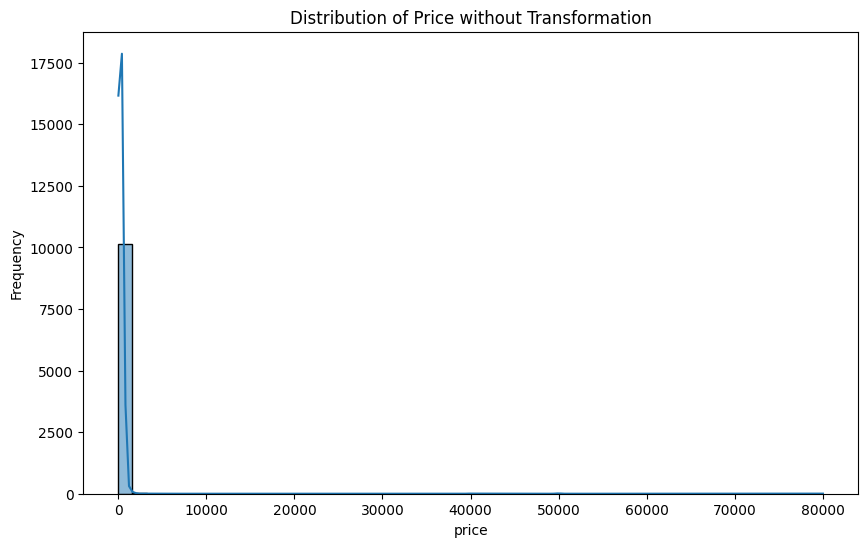

In [ ]:
#visualization of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price without Transformation')
plt.xlabel('price')    
plt.ylabel('Frequency')
plt.show()

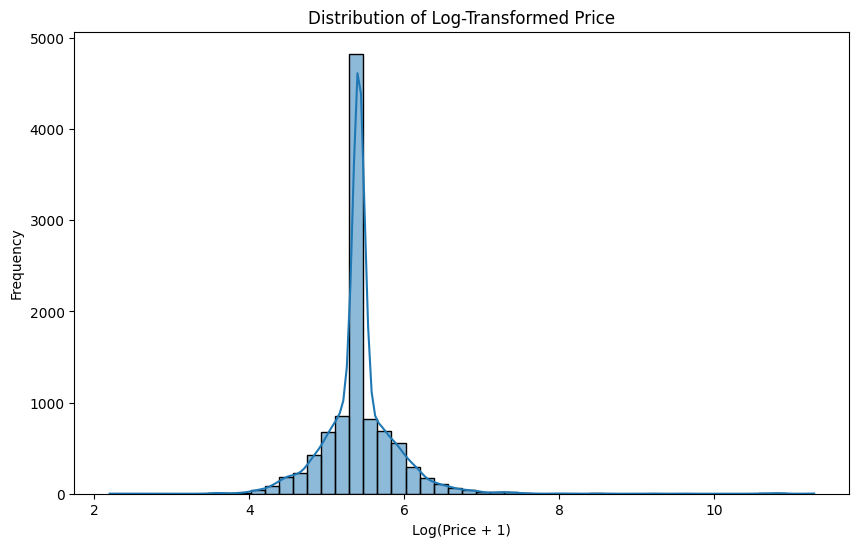

In [86]:
#visualization of price_log
plt.figure(figsize=(10, 6))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price + 1)')    
plt.ylabel('Frequency')
plt.show()
